In [31]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# to switch from one to another, you have to select Kernel->Restart

%matplotlib notebook

from modsim import *

In [32]:
#establish units

m = UNITS.meter
km = UNITS.kilometer
kg = UNITS.kilogram
s = UNITS.second
mn = UNITS.minute
hr = UNITS.hour
degree = UNITS.degree
radian = UNITS.radian
N = UNITS.newton
kN = UNITS.kilonewton

In [33]:
# PROJECTILE MOTION CONDITIONS

condition = Condition(x = 0 * m, 
                      y = 1 * m,
                      g = 9.8 * m/s**2,
                      mass = 31950 * kg,
                      diameter = 21.3 * m, #taken from average of height, width, and length
                      rho = 0.4671 * kg/m**3, #density of air CHANGE TO GROUND LEVEL, NOT AT CRUISING ALT.
                      C_d = 0.019, #drag coefficient 
                      angle = 30 * degree,
                      velocity = 795 * km / hr,
                      duration = 23 * hr)

In [34]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

system = make_system(condition)
system

,value
init,x 0 meter y ...
g,9.8 meter / second ** 2
mass,31950 kilogram
area,356.3272927517884 meter ** 2
rho,0.4671 kilogram / meter ** 3
C_d,0.019
ts,"[0.0 hour, 0.23 hour, 0.46 hour, 0.69000000000..."


In [35]:
#slope function that computes acceleration due to gravity and drag

def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state
    unpack(system)
    
    a_grav = Vector(0, -g)
        
    v = Vector(vx, vy)
    
    f_drag = -rho * v.mag * v * C_d * area / 2
    a_drag = f_drag / mass
    
    thrust = 100000 * v * kg *km / hr /m
    a_thrust = thrust / mass
    
    print (f_drag, thrust)
    
    a = a_grav + a_drag + a_thrust
    
    return vx, vy, a.x, a.y



In [36]:
run_odeint(system, slope_func)

[-865460.89568492 -499674.08109679] kilogram * kilometer ** 2 / hour ** 2 / meter [ 68849019.60086288  39749999.99999999] kilogram * kilometer ** 2 / hour ** 2 / meter
[-66779.39009915 -38555.09885006] kilogram / meter [ 19124727.66690636  11041666.66666667] kilogram * kilometer / hour / meter
[-66779.46231947 -38555.13836287] kilogram / meter [ 19124738.1437676   11041672.09012657] kilogram * kilometer / hour / meter
[-66779.46231951 -38555.13836289] kilogram / meter [ 19124738.14377327  11041672.0901295 ] kilogram * kilometer / hour / meter
[-66779.53453992 -38555.17787574] kilogram / meter [ 19124748.62064018  11041677.51359233] kilogram * kilometer / hour / meter
[-66779.53453996 -38555.17787576] kilogram / meter [ 19124748.62064585  11041677.51359526] kilogram * kilometer / hour / meter
[-66867.32365636 -38603.2077362 ] kilogram / meter [ 19137479.81946466  11048267.95244133] kilogram * kilometer / hour / meter
[-66867.3236656  -38603.20774124] kilogram / meter [ 19137479.82080396

In [37]:
xs = system.results.x/60/60
ys = system.results.y

<IPython.core.display.Javascript object>


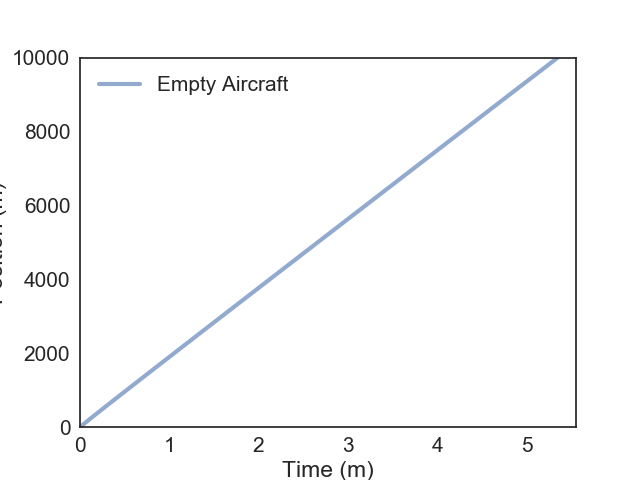

In [38]:
newfig()
plot(xs, ys, label='Empty Aircraft')
#plot(ys, label='y')

decorate(xlabel='Time (m)',
         ylabel='Position (m)',
         xlim=[0, 2000/6/60],
         ylim=[0, 10000])


In [41]:
condition_two = Condition(x = 0 * m, 
                      y = 1 * m,
                      g = 9.8 * m/s**2,
                      mass = 31950 * kg + 573050 * kg, #max weight capacity of plane
                      diameter = 21.3 * m, #taken from average of height, width, and length
                      rho = 0.4671 * kg/m**3, #density of air
                      C_d = 0.019, #drag coefficient 
                      angle = 30 * degree,
                      velocity = 795 * km / hr,
                      duration = 23 * hr)

In [42]:
def make_system_two(condition_two):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition_two)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

system_two = make_system(condition_two)
system_two

,value
init,x 0 meter y ...
g,9.8 meter / second ** 2
mass,605000 kilogram
area,356.3272927517884 meter ** 2
rho,0.4671 kilogram / meter ** 3
C_d,0.019
ts,"[0.0 hour, 0.23 hour, 0.46 hour, 0.69000000000..."


In [43]:
#slope function that computes acceleration due to gravity and drag

def slope_func_two(state_two, t, system_two):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state_two
    unpack(system_two)
    
    a_grav = Vector(0, -g)
        
    v = Vector(vx, vy)
    
    f_drag = -rho * v.mag * v * C_d * area / 2
    a_drag = f_drag / mass
    
    thrust = 100000 * v * kg *km / hr /m
    a_thrust = thrust / mass
    
    print (f_drag, thrust)
    
    a = a_grav + a_drag + a_thrust
    
    return vx, vy, a.x, a.y


In [44]:
run_odeint(system_two, slope_func_two)

[-865460.89568492 -499674.08109679] kilogram * kilometer ** 2 / hour ** 2 / meter [ 68849019.60086288  39749999.99999999] kilogram * kilometer ** 2 / hour ** 2 / meter
[-66779.39009915 -38555.09885006] kilogram / meter [ 19124727.66690636  11041666.66666667] kilogram * kilometer / hour / meter
[-66779.39301749 -38555.09835135] kilogram / meter [ 19124728.22018853  11041666.36074552] kilogram * kilometer / hour / meter
[-66779.39301749 -38555.09835135] kilogram / meter [ 19124728.22018855  11041666.36074551] kilogram * kilometer / hour / meter
[-66779.39593584 -38555.09785265] kilogram / meter [ 19124728.77347074  11041666.05482436] kilogram * kilometer / hour / meter
[-66779.39593584 -38555.09785265] kilogram / meter [ 19124728.77347076  11041666.05482435] kilogram * kilometer / hour / meter
[-66803.74423099 -38550.93731472] kilogram / meter [ 19129344.26379255  11039114.05078134] kilogram * kilometer / hour / meter
[-66803.74423133 -38550.93731465] kilogram / meter [ 19129344.26385737

In [45]:
xs = system_two.results.x/60/60
ys = system_two.results.y

<IPython.core.display.Javascript object>


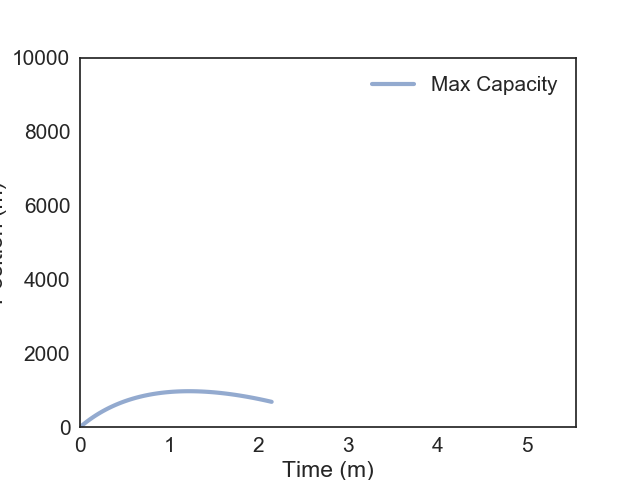

In [46]:
newfig()
plot(xs, ys, label='Max Capacity')
#plot(ys, label='y')

decorate(xlabel='Time (m)',
         ylabel='Position (m)',
         xlim=[0, 20000/60/60],
         ylim=[0, 10000])

In [47]:
mass_array = linspace(0.1, 0.7, 4) #redefine numbers later

In [48]:
def sweep_mass(mass_array, velocity):
    sweep = SweepSeries()
    for mass in mass_array:
        condition.set(mass = mass, velocity = velocity)
        system = make_system(condition)
        run_odeint(system, slope_func)
        sweep[mass] = calc_mass_stuff(system)
        
    return sweep

<IPython.core.display.Javascript object>


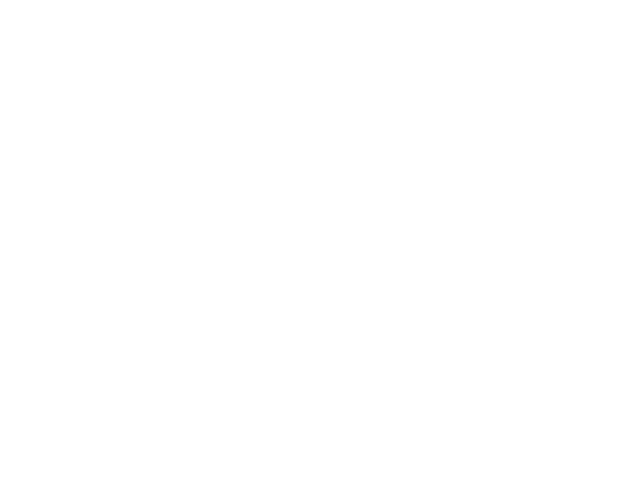

Before running scipy.integrate.odeint, I tried
                 running the slope function you provided with the
                 initial conditions in system and t=0, and I got
                 the following error:


[-865460.89568492 -499674.08109679] kilogram * kilometer ** 2 / hour ** 2 / meter [ 68849019.60086288  39749999.99999999] kilogram * kilometer ** 2 / hour ** 2 / meter


DimensionalityError: Cannot convert from 'meter / second ** 2' ([length] / [time] ** 2) to 'kilogram * kilometer ** 2 / hour ** 2 / meter' ([length] * [mass] / [time] ** 2)

In [49]:
newfig()
mass_sweep = sweep_mass(mass_array, condition.velocity)

plot(mass_sweep)
decorate(title = 'Mass Sweep')